In [2]:
#Import the Pandas library 
import pandas as pd

In [3]:
#Import our data files that we've scraped and combine them.

df_1 = pd.read_csv("/kaggle/input/trumbull-county-20212025-singlefamilyhomes/TrumbullCountyOH-20250410-33fa4cdeb9ee4e6a9e9dc8705a279588.csv")
df_2 = pd.read_csv("/kaggle/input/trumbull-county-20212025-singlefamilyhomes/TrumbullCountyOH-20250410-a0f793e96e7c457595e9418ec53a60af.csv")
df = pd.concat([df_1, df_2], ignore_index=True)


In [4]:
#Look at the top 5 lines of our data
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

Parcel ID             Address                                   Grantor  \
0  03-392400  6512 WARREN SHARON          STEPHEN A NERAL   REBECCA ZARATE   
1  03-392400  6512 WARREN SHARON  STEPHEN A NERAL   BARBARA J PETO ZAGOREC   
2  04-000650      6991 AMY BOYLE                  MISSION STREET HOMES LLC   
3  28-555880       7716 ANDERSON                          CHARLES M ROGERS   
4  35-088960      2499 EDGEWATER                       LINDA P MCKIMMY T/D   

                               Grantee   Sale Date   Sale Price  Book  Page  \
0                       REBECCA ZARATE    4/3/2025  $156,000.00   NaN   NaN   
1     STEPHEN A NERAL   REBECCA ZARATE    4/3/2025  $156,000.00   NaN   NaN   
2                       DAVID W MILLER  10/27/2023  $324,680.00   NaN   NaN   
3  STEVEN T CARTER J/S SARAH R HEAVNER    4/9/2025  $171,000.00   NaN   NaN   
4             M WALKER INVESTMENTS LLC    4/9/2025  $148,000.00   NaN   NaN   

         Instrument  Ref Number  ...  Year  Built  Bedrooms Full  Baths  \
0  WD-WARRANTY DEED         NaN  ...        1950.0      3.0         1.0   
1  AR-ADMINISTRATOR         NaN  ...        1950.0      3.0         1.0   
2  WD-WARRANTY DEED         NaN  ...        1977.0      3.0         2.0   
3  WD-WARRANTY DEED         NaN  ...        1962.0      3.0         2.0   
4  WD-WARRANTY DEED         NaN  ...        1985.0      3.0         2.0   

  Half  Baths  Square Ft   Price Per  Square Ft             Neighborhood  \
0         0.0      1488.0                $104.84  12000 - BROOKFIELD TWP   
1         0.0      1488.0                $104.84  12000 - BROOKFIELD TWP   
2         1.0      2426.0                $133.83     12400 - YANKEE LAKE   
3         0.0       960.0                $178.13     38302 - HOWLAND TWP   
4         0.0      1092.0                $135.53       20100 - MECCA TWP   

   Number Of Parcels            City School District  
0              $1.00  UNINCORPORATED  BROOKFIELD LSD  
1              $1.00  UNINCORPORATED  BROOKFIELD LSD  
2              $1.00  UNINCORPORATED  BROOKFIELD LSD  
3              $1.00  UNINCORPORATED     HOWLAND LSD  
4              $1.00  UNINCORPORATED   MAPLEWOOD LSD  

[5 rows x 24 columns]

In [126]:
#Look at the columns of our data to see which ones we want to drop.
df.columns

Index(['Parcel ID', 'Address', 'Grantor', 'Grantee', 'Sale Date', 'Sale Price',
       'Book', 'Page', 'Instrument', 'Ref Number', 'Acres', 'Land Use',
       'Tax District', 'Appraised  Value ', 'Year  Built ', 'Bedrooms',
       'Full  Baths', 'Half  Baths', 'Square Ft ', 'Price Per  Square Ft ',
       'Neighborhood', 'Number Of Parcels', 'City', 'School District'],
      dtype='object')

In [127]:
#Lets get rid of the columns we know we don't need or want. We also have to make sure we don't have
# price per SQ/FT as it would leak the price information. 
#We also need to clean the column names and strip spaces
drop_cols = [
    'Parcel ID', 'Address', 'Grantor', 'Grantee', 'Sale Date',
    'Book', 'Page', 'Ref Number', 'Land Use', 'Instrument',
    'Tax District', 'Price Per  Square Ft '
]

df = df.drop(columns=drop_cols)

# Clean column names and strip spaces
df.columns = df.columns.str.strip()

In [128]:
df.head()

Sale Price   Acres Appraised  Value  Year  Built  Bedrooms  Full  Baths  \
0  $156,000.00  4.0800      $146,700.00       1950.0       3.0          1.0   
1  $156,000.00  4.0800      $146,700.00       1950.0       3.0          1.0   
2  $324,680.00  1.1080      $237,100.00       1977.0       3.0          2.0   
3  $171,000.00  0.2204      $111,200.00       1962.0       3.0          2.0   
4  $148,000.00  0.5331      $130,200.00       1985.0       3.0          2.0   

   Half  Baths  Square Ft            Neighborhood Number Of Parcels  \
0          0.0     1488.0  12000 - BROOKFIELD TWP             $1.00   
1          0.0     1488.0  12000 - BROOKFIELD TWP             $1.00   
2          1.0     2426.0     12400 - YANKEE LAKE             $1.00   
3          0.0      960.0     38302 - HOWLAND TWP             $1.00   
4          0.0     1092.0       20100 - MECCA TWP             $1.00   

             City School District  
0  UNINCORPORATED  BROOKFIELD LSD  
1  UNINCORPORATED  BROOKFIELD LSD  
2  UNINCORPORATED  BROOKFIELD LSD  
3  UNINCORPORATED     HOWLAND LSD  
4  UNINCORPORATED   MAPLEWOOD LSD

In [129]:
# Check unique values in the 'City' column
unique_cities = df['City'].value_counts(dropna=False)
unique_cities.head(30)

City
UNINCORPORATED              9748
NILES CITY - HOWLAND LSD      58
Name: count, dtype: int64

In [130]:
#This column is useless as most of the cities aren't named.
df = df.drop(columns=['City'])

In [131]:
#Lets look at our data again and make sure it looks ok.
df.head()

Sale Price   Acres Appraised  Value  Year  Built  Bedrooms  Full  Baths  \
0  $156,000.00  4.0800      $146,700.00       1950.0       3.0          1.0   
1  $156,000.00  4.0800      $146,700.00       1950.0       3.0          1.0   
2  $324,680.00  1.1080      $237,100.00       1977.0       3.0          2.0   
3  $171,000.00  0.2204      $111,200.00       1962.0       3.0          2.0   
4  $148,000.00  0.5331      $130,200.00       1985.0       3.0          2.0   

   Half  Baths  Square Ft            Neighborhood Number Of Parcels  \
0          0.0     1488.0  12000 - BROOKFIELD TWP             $1.00   
1          0.0     1488.0  12000 - BROOKFIELD TWP             $1.00   
2          1.0     2426.0     12400 - YANKEE LAKE             $1.00   
3          0.0      960.0     38302 - HOWLAND TWP             $1.00   
4          0.0     1092.0       20100 - MECCA TWP             $1.00   

  School District  
0  BROOKFIELD LSD  
1  BROOKFIELD LSD  
2  BROOKFIELD LSD  
3     HOWLAND LSD  
4   MAPLEWOOD LSD

In [132]:
#Lets check our columns again 
df.columns

Index(['Sale Price', 'Acres', 'Appraised  Value', 'Year  Built', 'Bedrooms',
       'Full  Baths', 'Half  Baths', 'Square Ft', 'Neighborhood',
       'Number Of Parcels', 'School District'],
      dtype='object')

In [133]:
#Let's remove the spaces and rename the columns with an underscore instead.
df.rename(columns={
    'Sale Price': 'Sale_Price',
    'Appraised  Value': 'Appraised_Value',
    'Year  Built': 'Year_Built',
    'Full  Baths': 'Full_Baths',
    'Half  Baths': 'Half_Baths',
    'Square Ft': 'Square_Ft',
    'Number Of Parcels': 'Number_Of_Parcels',
    'School District': 'School_District'
}, inplace=True)


In [134]:
#Lets check out data now and make sure the columns look okay.
df.head()

Sale_Price   Acres Appraised_Value  Year_Built  Bedrooms  Full_Baths  \
0  $156,000.00  4.0800     $146,700.00      1950.0       3.0         1.0   
1  $156,000.00  4.0800     $146,700.00      1950.0       3.0         1.0   
2  $324,680.00  1.1080     $237,100.00      1977.0       3.0         2.0   
3  $171,000.00  0.2204     $111,200.00      1962.0       3.0         2.0   
4  $148,000.00  0.5331     $130,200.00      1985.0       3.0         2.0   

   Half_Baths  Square_Ft            Neighborhood Number_Of_Parcels  \
0         0.0     1488.0  12000 - BROOKFIELD TWP             $1.00   
1         0.0     1488.0  12000 - BROOKFIELD TWP             $1.00   
2         1.0     2426.0     12400 - YANKEE LAKE             $1.00   
3         0.0      960.0     38302 - HOWLAND TWP             $1.00   
4         0.0     1092.0       20100 - MECCA TWP             $1.00   

  School_District  
0  BROOKFIELD LSD  
1  BROOKFIELD LSD  
2  BROOKFIELD LSD  
3     HOWLAND LSD  
4   MAPLEWOOD LSD

In [135]:
#Lets check the data type.  We will need to remove the $ and convert all numeric columns to a float or int.

df.dtypes

Sale_Price            object
Acres                float64
Appraised_Value       object
Year_Built           float64
Bedrooms             float64
Full_Baths           float64
Half_Baths           float64
Square_Ft            float64
Neighborhood          object
Number_Of_Parcels     object
School_District       object
dtype: object

In [136]:
# Remove $_ and , and convert to float
df['Sale_Price'] = df['Sale_Price'].replace('[\$,]', '', regex=True).astype(float)
df['Appraised_Value'] = df['Appraised_Value'].replace('[\$,]', '', regex=True).astype(float)

# Convert Number Of Parcels
df['Number_Of_Parcels'] = pd.to_numeric(df['Number_Of_Parcels'], errors='coerce').fillna(1).astype(int)


In [137]:
#Rechecking our data types
df.dtypes

Sale_Price           float64
Acres                float64
Appraised_Value      float64
Year_Built           float64
Bedrooms             float64
Full_Baths           float64
Half_Baths           float64
Square_Ft            float64
Neighborhood          object
Number_Of_Parcels      int64
School_District       object
dtype: object

In [138]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Neighborhood', 'School_District'], drop_first=True)


In [139]:
df.head()

Sale_Price   Acres  Appraised_Value  Year_Built  Bedrooms  Full_Baths  \
0    156000.0  4.0800         146700.0      1950.0       3.0         1.0   
1    156000.0  4.0800         146700.0      1950.0       3.0         1.0   
2    324680.0  1.1080         237100.0      1977.0       3.0         2.0   
3    171000.0  0.2204         111200.0      1962.0       3.0         2.0   
4    148000.0  0.5331         130200.0      1985.0       3.0         2.0   

   Half_Baths  Square_Ft  Number_Of_Parcels  \
0         0.0     1488.0                  1   
1         0.0     1488.0                  1   
2         1.0     2426.0                  1   
3         0.0      960.0                  1   
4         0.0     1092.0                  1   

   Neighborhood_10100 - HUBBARD CITY  ...  School_District_LIBERTY LSD  \
0                              False  ...                        False   
1                              False  ...                        False   
2                              False  ...                        False   
3                              False  ...                        False   
4                              False  ...                        False   

   School_District_LORDSTOWN LSD  School_District_MAPLEWOOD LSD  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                           True   

   School_District_MATHEWS LSD  School_District_MC DONALD LSD  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                          False   
4                        False                          False   

   School_District_NEWTON FALLS EVSD  School_District_NILES CSD  \
0                              False                      False   
1                              False                      False   
2                              False                      False   
3                              False                      False   
4                              False                      False   

   School_District_SOUTHINGTON LSD  School_District_WARREN CSD  \
0                            False                       False   
1                            False                       False   
2                            False                       False   
3                            False                       False   
4                            False                       False   

   School_District_WEATHERSFIELD LSD  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False  

[5 rows x 260 columns]

In [140]:
df.columns

Index(['Sale_Price', 'Acres', 'Appraised_Value', 'Year_Built', 'Bedrooms',
       'Full_Baths', 'Half_Baths', 'Square_Ft', 'Number_Of_Parcels',
       'Neighborhood_10100 - HUBBARD CITY',
       ...
       'School_District_LIBERTY LSD', 'School_District_LORDSTOWN LSD',
       'School_District_MAPLEWOOD LSD', 'School_District_MATHEWS LSD',
       'School_District_MC DONALD LSD', 'School_District_NEWTON FALLS EVSD',
       'School_District_NILES CSD', 'School_District_SOUTHINGTON LSD',
       'School_District_WARREN CSD', 'School_District_WEATHERSFIELD LSD'],
      dtype='object', length=260)

In [141]:
#Import SKlearn for model selection and XGBoost. Also importing Matplotlib to plot our data.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

In [142]:
# Split features and target
X = df.drop(columns=['Sale_Price'])
y = df['Sale_Price']

In [143]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [144]:
# Initialize and train XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=12, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [145]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")

Mean Absolute Error (MAE): $27,240.25


<Figure size 1000x800 with 0 Axes>

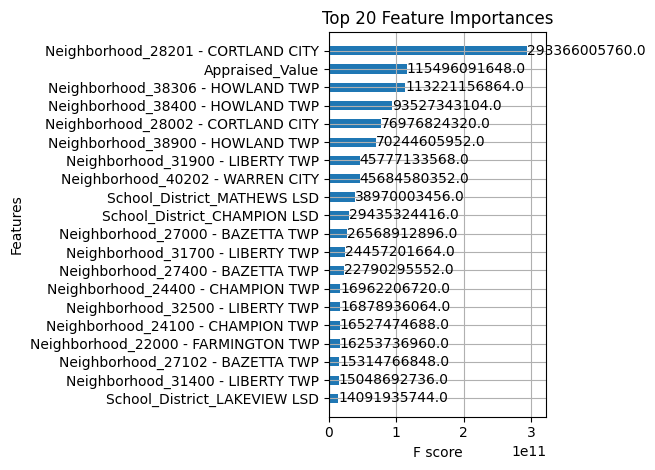

In [146]:
# Plot top 20 features by importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20, importance_type='gain', height=0.5)
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()


In [147]:
import optuna
from optuna.pruners import HyperbandPruner
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import joblib

# 1. Split dataset
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'n_jobs': -1,
    }

    model = XGBRegressor(**params)

    # Early stopping rounds
    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=30,
        verbose=False
    )

    preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    trial.report(mae, step=0)

    # Prune if necessary
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return mae

# 3. Create study with Hyperband pruner
pruner = HyperbandPruner(min_resource=1, max_resource=1000, reduction_factor=3)
study = optuna.create_study(direction="minimize", pruner=pruner)
study.optimize(objective, n_trials=50, timeout=900)  # Timeout = 15 mins (optional)

# 4. Print results
print(f"Best MAE: {study.best_value:.2f}")
print("Best Parameters:")
print(study.best_params)
#5.  Visualize with Optuna 

import optuna.visualization as vis

# 1. Optimization history (see MAE improve per trial)
vis.plot_optimization_history(study).show()

# 2. Which parameters mattered most?
vis.plot_param_importances(study).show()



[I 2025-04-21 13:04:34,161] A new study created in memory with name: no-name-9ba04835-eb15-4fda-800f-72d97ba7aaa0
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

[I 2025-04-21 13:04:36,609] Trial 0 finished with value: 25622.087429221618 and parameters: {'n_estimators': 269, 'max_depth': 8, 'learning_rate': 0.22156269253856137, 'subsample': 0.7269921635839565, 'colsample_bytree': 0.7996087975984323, 'gamma': 0.9068709051647805, 'reg_alpha': 4.978301836497433, 'reg_lambda': 1.735295911595705}. Best is trial 0 with value: 25622.087429221618.
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

[I 2025-04-21 

Best MAE: 17295.36
Best Parameters:
{'n_estimators': 940, 'max_depth': 12, 'learning_rate': 0.1744729525697609, 'subsample': 0.9976726754830219, 'colsample_bytree': 0.7542860970264084, 'gamma': 1.5322816860958266, 'reg_alpha': 1.4456630144394167, 'reg_lambda': 2.3320274711083346}


In [1]:
# Parallel coordinate plot - multivariable interactions
optuna.visualization.plot_parallel_coordinate(study).show()

# Contour plot for selected param pairs
optuna.visualization.plot_contour(
    study,
    params=["max_depth", "learning_rate"]
).show()

In [3]:

import joblib

# Train final model on full training data
best_model = XGBRegressor(
    **study.best_params,
    random_state=42,
    n_jobs=-1
)

best_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    early_stopping_rounds=30,
    verbose=False
)

# Save model
joblib.dump(best_model, "xgb_best_model_v2.pkl")

# Save feature column names
joblib.dump(list(X.columns), "xgb_feature_columns_v2.pkl")

print("✅ Final model and feature list saved!")

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



✅ Final model and feature list saved!


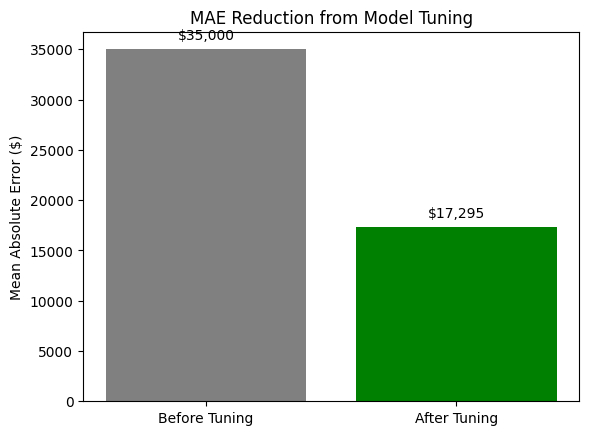

Annual Estimated Savings at 500 Homes/Year: $8,852,320.00


In [4]:
import matplotlib.pyplot as plt

mae_before = 35000  # 1st Baseline estimate 
mae_after = 17295.36
savings_per_home = mae_before - mae_after
homes = 500
impact = savings_per_home * homes

plt.bar(['Before Tuning', 'After Tuning'], [mae_before, mae_after], color=['gray', 'green'])
plt.title("MAE Reduction from Model Tuning")
plt.ylabel("Mean Absolute Error ($)")
plt.text(0, mae_before + 1000, f"${mae_before:,.0f}", ha='center')
plt.text(1, mae_after + 1000, f"${mae_after:,.0f}", ha='center')
plt.show()

print(f"Annual Estimated Savings at 500 Homes/Year: ${impact:,.2f}")

In [7]:
joblib.dump(best_model, "xgb_best_model_v2.pkl")



['xgb_best_model_v2.pkl']